Project Phase 04
You identified your research question and explored the characteristics of your desired dataset as
the outcome of the last project phases. It is the time to complete the previous phases by providing
a prediction strategy for unseen data and provide an educated guess regarding the probable
successfulness of our suggested model. To provide a successful predictive model, please follow
the steps below:
1. Most AI/ML algorithms accept the input data in a specific form. As a result, preprocessing
the input samples shape an important step of working with data. Keras and scikit-learn
provide an enriched library of preprocessing [1]. Please apply the required transformations
on your data. The following steps describe some of the required transformations:
a. It is a good idea to transform your categorical features to numerical ones using
encoding methods. You can use either to_categorical function in Keras or the
methods provided in Scikit-learn [3].
b. AI/ML algorithms are interested to weight more to the features that better separate
samples in respect to the target feature. So, it is a common pitfall for these
algorithms to tend to provide more weight to features with higher diversity. Also,
non-scaled features can disrupt the optimization process. Say, the zig-zag behavior
of gradient decent optimization To avoid such behaviors, you can transform
features to a standard scale using Batch normalization layer or StandardScalar()
function over direct data [4].
c. If you are working with tabular data, you must be able to recognize the highly
related features form the previous project phase. Please remember to just use one
of the related features in further analysis.
d. If you are using an image dataset, usually your algorithm requires to use images in
the same size, you can use image preprocessing layers [5].
2. To have a fare evaluation, you are recommended to break your data to three parts of
train, validation, and test.
3. Design and create your initial model based on your research plan
4. Measure the performance of your model by calling predict method from you created
model. Following this pass the predicted values and the real values to your performance
measure metric. Say, accuracy for the classification task and MES for regression.
5. Investigate the performance of your modules using different metrics including
Accuracy/MAE, Confusion Matrix, Receiver Operating Characteristic plot using
roc_curve() method.

In [ ]:
# Import libraries and data
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import zipfile
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# 1. Imports dataset and stores it in a data frame

In [ ]:
# Install Kaggle
! pip install kaggle

# Download dataset
!kaggle datasets download heesoo37/120-years-of-olympic-history-athletes-and-results

# Extract dataset from zip file
with zipfile.ZipFile('120-years-of-olympic-history-athletes-and-results.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')
df = pd.read_csv('dataset/athlete_events.csv')

Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
License(s): CC0-1.0
 74% 4.00M/5.43M [00:01<00:00, 4.36MB/s]
100% 5.43M/5.43M [00:01<00:00, 4.10MB/s]


#2 Convert Object Columns to Numerical

In [ ]:
# Dictionary to store LabelEncoders for reverse transformation
label_encoders = {}

# Encode 'Medal' feature manually
medal_mapping = {
     np.NaN: 0,     # No Medal
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
}
df['Medal'] = df['Medal'].map(medal_mapping)

# Save reverse mapping for 'Medal'
label_encoders['Medal'] = {v: k for k, v in medal_mapping.items()}

# List of categorical columns to encode
categorical_cols = ['Sex', 'Season', 'Sport', 'Event', 'Team']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical values to numbers
    label_encoders[col] = le  # Save encoder for future decoding

# 3. Explores the number of samples and features in the dataset

In [ ]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  int64  
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  int64  
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  int64  
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  int64  
 13  Event   271116 non-null  int64  
 14  Medal   271116 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 31.0+ MB


# 4. Remove data prior to 1960
*   Remove all data before 1960
*   Remove columns: 'Name', 'NOC' , 'Games' ,  'Season', 'Team', 'Medal'

In [ ]:
df = df[df['Year'] >= 1960]
df = df.drop(['Name', 'NOC', 'City', 'Games'], axis=1)

# 4. Discovers the data type of our features

In [ ]:
print(df.dtypes)

ID          int64
Sex         int64
Age       float64
Height    float64
Weight    float64
Team        int64
Year        int64
Season      int64
Sport       int64
Event       int64
Medal       int64
dtype: object


# 5. Explores the number of samples with N/A value

In [ ]:
df.isnull()

,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False
271112,False,False,False,False,False,False,False,False,False,False,False
271113,False,False,False,False,False,False,False,False,False,False,False
271114,False,False,False,False,False,False,False,False,False,False,False


# 6. Identifies duplicated samples

In [ ]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display duplicates
print(duplicates)

# Removes all N/A values
df = df.dropna()

Empty DataFrame
Columns: [ID, Sex, Age, Height, Weight, Team, Year, Season, Sport, Event, Medal]
Index: []


# 7. Preprocessing

# 7b. Standardize Numerical Features

In [ ]:
# Standardize numerical features
numerical_features = ['Height', 'Weight', 'Age']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<ipython-input-9-36a7f5c10f88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


# 8. Data Splitting

In [ ]:
print(df.isna().sum())  # Check for missing values
print(np.isinf(df).sum())  # Check for infinite values

# Splitting dataset into training and testing
X = df.drop(columns=['Medal'])
y = df['Medal']
print(df.shape)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ID        0
Sex       0
Age       0
Height    0
Weight    0
Team      0
Year      0
Season    0
Sport     0
Event     0
Medal     0
dtype: int64
ID        0
Sex       0
Age       0
Height    0
Weight    0
Team      0
Year      0
Season    0
Sport     0
Event     0
Medal     0
dtype: int64
(196084, 11)


In [ ]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196084 entries, 0 to 271115
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      196084 non-null  int64  
 1   Sex     196084 non-null  int64  
 2   Age     196084 non-null  float64
 3   Height  196084 non-null  float64
 4   Weight  196084 non-null  float64
 5   Team    196084 non-null  int64  
 6   Year    196084 non-null  int64  
 7   Season  196084 non-null  int64  
 8   Sport   196084 non-null  int64  
 9   Event   196084 non-null  int64  
 10  Medal   196084 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 18.0 MB


# 9. Fitting the model

In [ ]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')  # 4 output classes for medal encoding
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,772 (49.89 KB)

 Trainable params: 12,324 (48.14 KB)

 Non-trainable params: 448 (1.75 KB)

# 10 Train Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),  # Use validation data to monitor performance
                    epochs=50,                      # Number of training iterations
                    batch_size=32,                  # Number of samples per batch
                    verbose=1)                      # Display training progress

Epoch 1/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8040 - loss: 0.6960 - val_accuracy: 0.8594 - val_loss: 0.5613
Epoch 2/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8561 - loss: 0.5719 - val_accuracy: 0.8591 - val_loss: 0.5629
Epoch 3/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8584 - loss: 0.5639 - val_accuracy: 0.8594 - val_loss: 0.5600
Epoch 4/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8583 - loss: 0.5634 - val_accuracy: 0.8593 - val_loss: 0.5618
Epoch 5/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8589 - loss: 0.5608 - val_accuracy: 0.8594 - val_loss: 0.5600
Epoch 6/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8579 - loss: 0.5635 - val_accuracy: 0.8594 - val_loss: 0.5608
Epoch 7/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8564 - loss: 0.5675 - val_accuracy: 0.8594 - val_loss: 0.5582
Epoch 8/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8577 - loss: 0

# 10a. Measuring Performance

In [ ]:
# Predict on the test set

print(X_test.head)
print(X_test.dtypes)
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

<bound method NDFrame.head of             ID  Sex       Age    Height    Weight  Team  Year  Season  Sport  \
132319   66597    0 -0.009648 -0.788682 -0.738629   361  2006       1     25   
168012   84413    1 -0.374617  2.317273  0.992285   809  1980       0     62   
199666  100295    1  0.902774  1.376075  1.476941   307  2004       0     63   
156123   78401    1  0.172836  0.717236  0.438392  1120  2016       0     54   
213068  106989    1  1.450227  0.246637  1.061521  1095  2006       1      1   
...        ...  ...       ...       ...       ...   ...   ...     ...    ...   
100977   51057    1  1.085258 -0.318082  0.576865    65  1960       0     65   
141252   70889    1 -0.192132  0.434876  0.230683   915  2000       0     54   
260385  130305    1  1.267743  0.434876  0.299919  1017  1998       1     17   
146714   73639    1  0.720289  1.564315  1.130758   741  1968       1     53   
114327   57898    1  0.355321  0.434876  1.476941   809  2014       1     12   

        E

# 10b. Accuracy/MAE

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8591


# 10c. Confusion matrix

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[25267     2     0     0]
 [ 1419     0     0     0]
 [ 1370     0     1     0]
 [ 1354     0     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     25269
           1       0.00      0.00      0.00      1419
           2       1.00      0.00      0.00      1371
           3       0.00      0.00      0.00      1354

    accuracy                           0.86     29413
   macro avg       0.46      0.25      0.23     29413
weighted avg       0.78      0.86      0.79     29413



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 10d. ROC curve

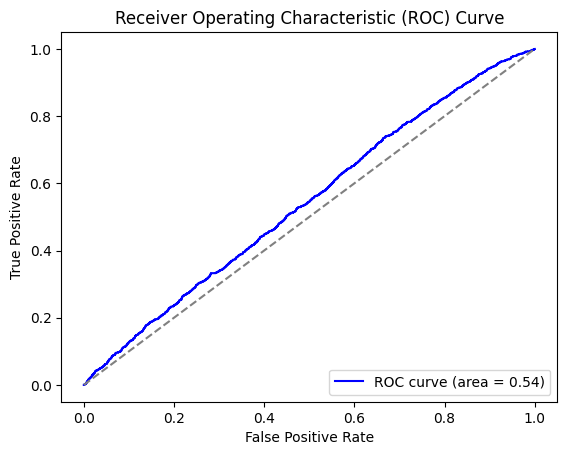

In [ ]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()